Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/168.5 kB ? eta -:--:--
     ------ ------------------------------ 30.7/168.5 kB 660.6 kB/s eta 0:00:01
     ------------- ----------------------- 61.4/168.5 kB 656.4 kB/s eta 0:00:01
     -------------------- ---------------- 92.2/168.5 kB 880.9 kB/s eta 0:00:01
     -------------------------------------- 168.5/168.5 kB 1.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/294.9 kB 3.6 MB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.2/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 6.6 MB/s eta 0:00:02
   -


[notice] A new release of pip is available: 23.3.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Accuracy: 95.62043795620438

Classification Report:
               precision    recall  f1-score   support

           2       0.98      0.96      0.97        89
           4       0.92      0.96      0.94        48

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137


Confusion Matrix:
 [[85  4]
 [ 2 46]]


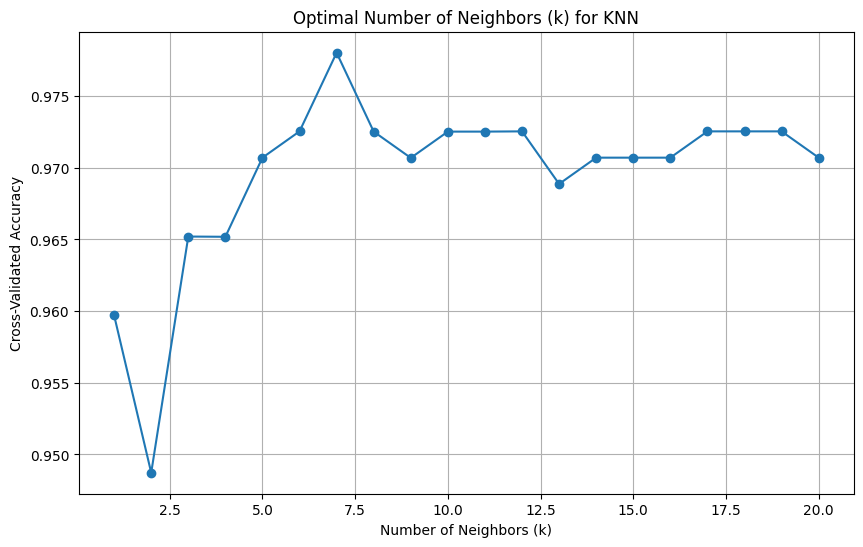

Best k: 7


C:\Users\Nagesh\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Predicted Class
3,2,1,1,2,1,3,1,1,2
7,6,8,5,7,8,7,6,5,4
5,3,4,3,3,2,4,3,2,2
9,8,8,7,8,9,8,7,6,4
4,4,4,4,4,4,4,4,4,4
4,4,2,1,2,5,2,1,2,2
8,10,10,8,7,10,9,7,1,4


C:\Users\Nagesh\AppData\Local\Temp\ipykernel_19040\3106176595.py:125: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data_cleaned["Class"], palette="viridis")


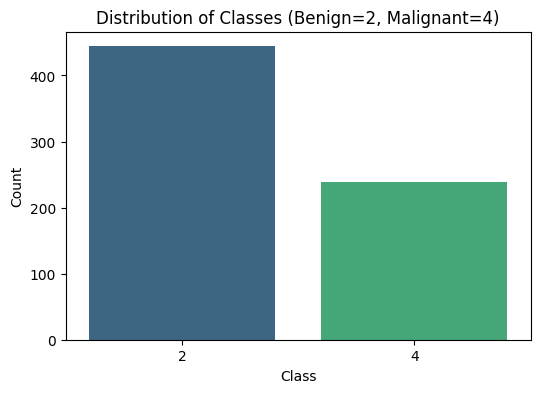

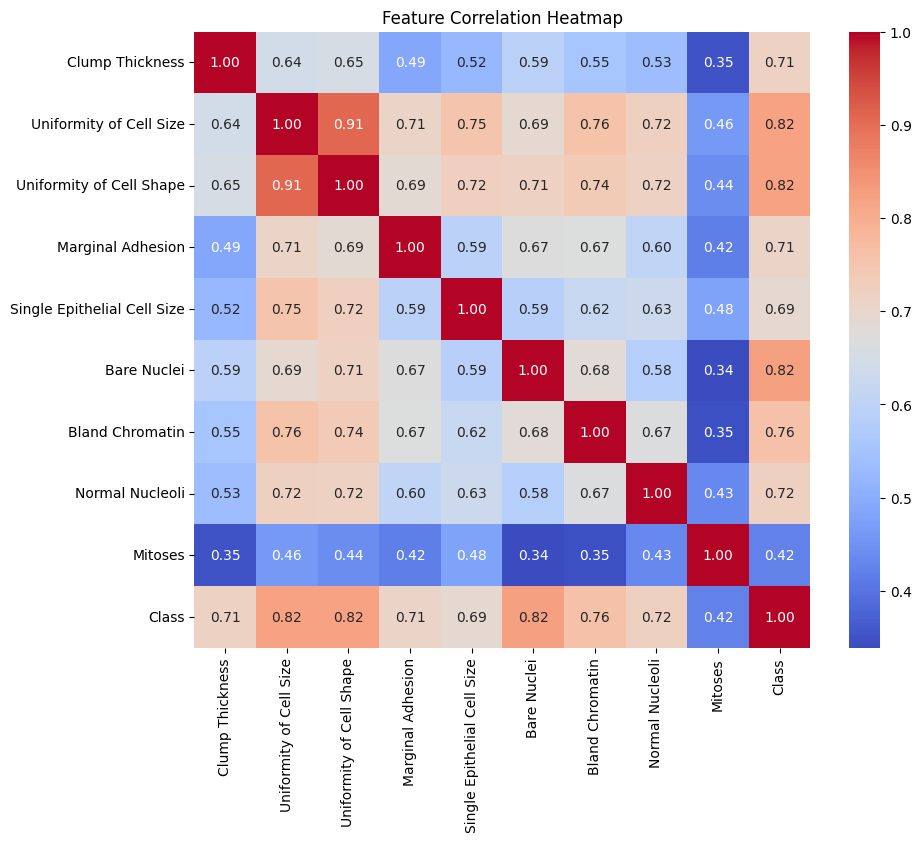

C:\Users\Nagesh\AppData\Local\Temp\ipykernel_19040\3106176595.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y=feature, data=data_cleaned, palette="viridis")
C:\Users\Nagesh\AppData\Local\Temp\ipykernel_19040\3106176595.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y=feature, data=data_cleaned, palette="viridis")
C:\Users\Nagesh\AppData\Local\Temp\ipykernel_19040\3106176595.py:154: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Class", y=feature, data=data_cleaned, palette="viridis")
C:\Users\Nagesh\App

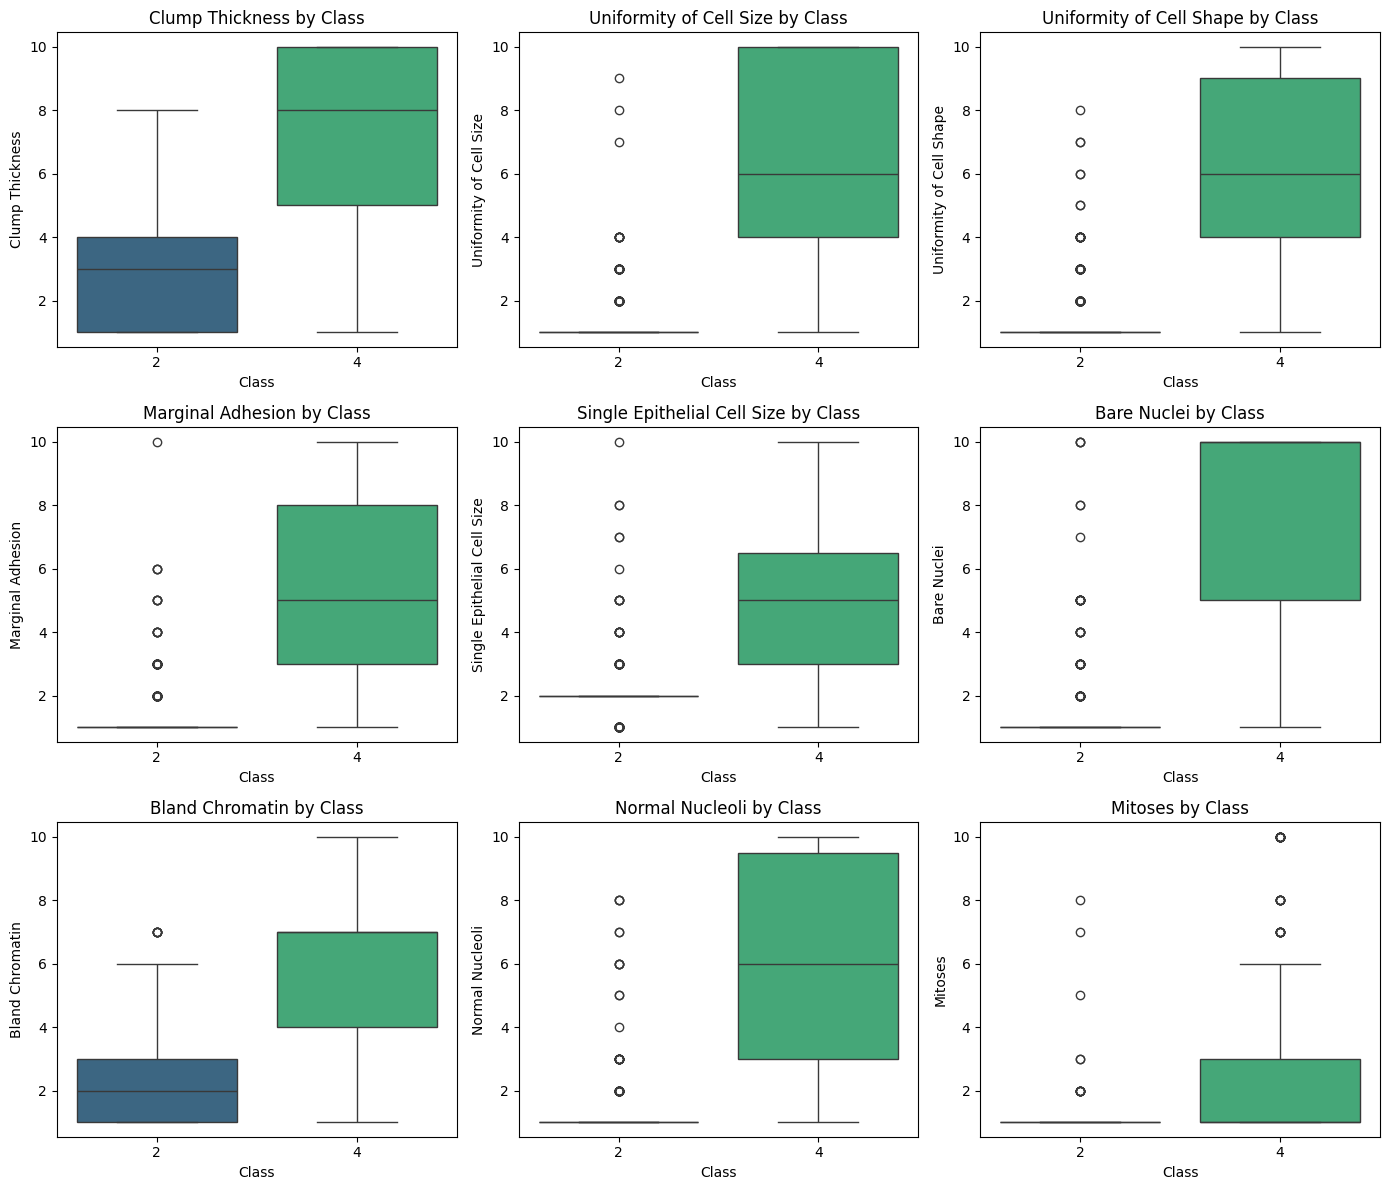

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = 'Datasets/breast-cancer-wisconsin.data'
columns = [
    "Sample Code Number", 
    "Clump Thickness", 
    "Uniformity of Cell Size", 
    "Uniformity of Cell Shape", 
    "Marginal Adhesion", 
    "Single Epithelial Cell Size", 
    "Bare Nuclei", 
    "Bland Chromatin", 
    "Normal Nucleoli", 
    "Mitoses", 
    "Class"
]
data = pd.read_csv(file_path, header=None, names=columns)

# Clean the dataset
data['Bare Nuclei'] = data['Bare Nuclei'].replace('?', np.nan).astype(float)
data_cleaned = data.dropna()

# Separate features and target variable
X = data_cleaned.drop(columns=["Sample Code Number", "Class"])
y = data_cleaned["Class"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_text = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy*100}")
print("\nClassification Report:\n", classification_report_text)
print("\nConfusion Matrix:\n", confusion_mat)

# Hyperparameter tuning for k
k_values = range(1, 21)
scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring="accuracy")
    scores.append(cv_scores.mean())

# Identify the best k
best_k = k_values[scores.index(max(scores))]

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker="o")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Optimal Number of Neighbors (k) for KNN")
plt.grid()
plt.show()

print(f"Best k: {best_k}")

# Retrain the KNN model with the best k
knn_optimized = KNeighborsClassifier(n_neighbors=best_k)
knn_optimized.fit(X_train_scaled, y_train)

# Define multiple test samples
test_samples = [
    [3, 2, 1, 1, 2, 1, 3, 1, 1],  # Likely benign
    [7, 6, 8, 5, 7, 8, 7, 6, 5],  # Likely malignant
    [5, 3, 4, 3, 3, 2, 4, 3, 2],  # Intermediate
    [9, 8, 8, 7, 8, 9, 8, 7, 6],  # Aggressive malignant
    [4, 4, 4, 4, 4, 4, 4, 4, 4],  # Borderline
    [4, 4, 2, 1, 2, 5, 2, 1, 2],  # ACTUAL BENIGN CASE
    [8, 10, 10, 8, 7, 10, 9, 7, 1] # ACTUAL MALIGNANT CASE
]

# Scale the test samples using the same scaler
test_samples_scaled = scaler.transform(test_samples)

# Predict the class for each sample
predicted_classes = knn_optimized.predict(test_samples_scaled)

# Combine samples and predictions for display
features = [
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
]
test_results = pd.DataFrame(test_samples, columns=features)
test_results["Predicted Class"] = predicted_classes

from IPython.core.display import HTML
html_table = test_results.to_html(index=False)
display(HTML(html_table))

# Visualizations

# 1. Distribution of Classes
plt.figure(figsize=(6, 4))
sns.countplot(x=data_cleaned["Class"], palette="viridis")
plt.title("Distribution of Classes (Benign=2, Malignant=4)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data_cleaned.drop(columns=["Sample Code Number"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()

# 3. Boxplots of Features by Class
features = [
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
]

plt.figure(figsize=(14, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Class", y=feature, data=data_cleaned, palette="viridis")
    plt.title(f"{feature} by Class")
    plt.xlabel("Class")
    plt.ylabel(feature)
plt.tight_layout()
plt.show()
